In [1]:
import pandas as pd
import matplotlib.pyplot as plt

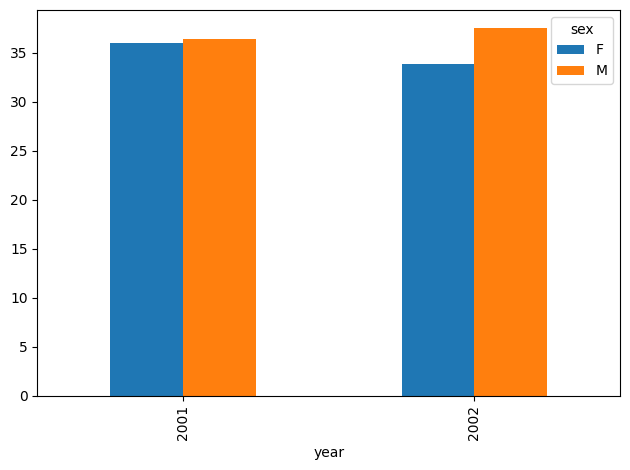

In [2]:
# read the files:
survey2001 = pd.read_csv("data/yearly_files/surveys2001.csv")
survey2002 = pd.read_csv("data/yearly_files/surveys2002.csv")
# concatenate
survey_all = pd.concat([survey2001, survey2002], axis=0)
# get the weight for each year, grouped by sex:
weight_year = survey_all.groupby(['year', 'sex']).mean(numeric_only=True)["weight"].unstack()
# plot:
weight_year.plot(kind="bar")
plt.tight_layout()  # tip: use this to improve the plot layout. 
# Try running the code without this line to see 
# what difference applying plt.tight_layout() makes.

In [3]:
# writing to file:
weight_year.to_csv("tmp/weight_for_year.csv")
# reading it back in:
pd.read_csv("tmp/weight_for_year.csv", index_col=0)

,F,M
year,,
2001,36.034771,36.404196
2002,33.878761,37.490506


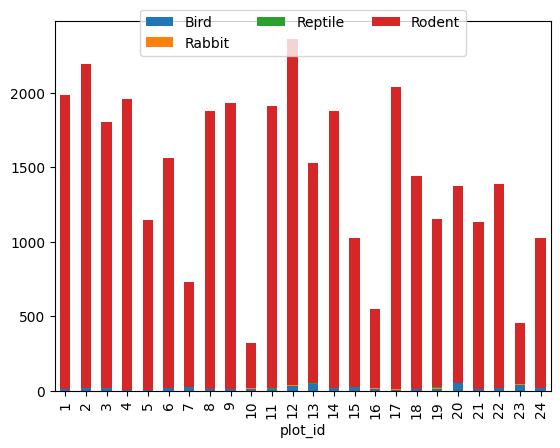

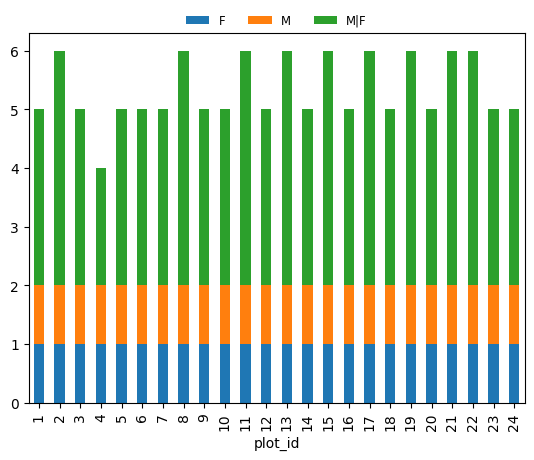

In [4]:
surveys_df = pd.read_csv("data/surveys.csv",
                         keep_default_na=False, na_values=[""])
species_df = pd.read_csv("data/species.csv",
                         keep_default_na=False, na_values=[""])

merged_left = pd.merge(left=surveys_df,right=species_df, how='left', on="species_id")
#merged_left.groupby(["plot_id"])["taxa"].nunique().plot(kind='bar')
merged_left.groupby(["plot_id", "taxa"]).count()["record_id"].unstack().plot(kind='bar', stacked=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05)) # stop the legend from overlapping with the bar plot

merged_left.loc[merged_left["sex"].isnull(), "sex"] = 'M|F'
ntaxa_sex_site= merged_left.groupby(["plot_id", "sex"])["taxa"].nunique().reset_index(level=1)
ntaxa_sex_site = ntaxa_sex_site.pivot_table(values="taxa", columns="sex", index=ntaxa_sex_site.index)
ntaxa_sex_site.plot(kind="bar", legend=False, stacked=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.08),
           fontsize='small', frameon=False)

Text(0.5, 0, 'Diversity index')

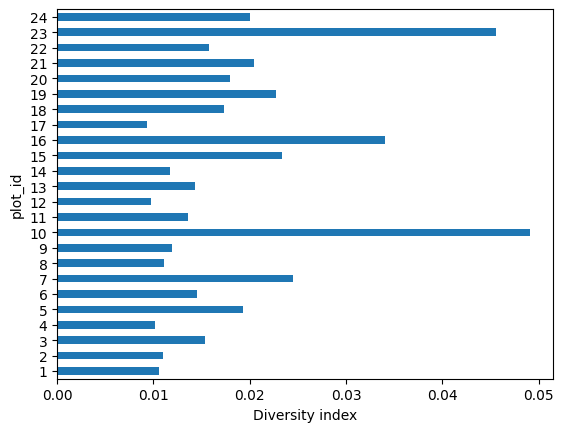

In [5]:
plot_info = pd.read_csv("data/plots.csv")
plot_info.groupby("plot_type").count()

merged_site_type = pd.merge(merged_left, plot_info, on='plot_id')
# For each plot, get the number of species for each plot
nspecies_site = merged_site_type.groupby(["plot_id"])["species"].nunique().rename("nspecies")
# For each plot, get the number of individuals
nindividuals_site = merged_site_type.groupby(["plot_id"]).count()['record_id'].rename("nindiv")
# combine the two series
diversity_index = pd.concat([nspecies_site, nindividuals_site], axis=1)
# calculate the diversity index
diversity_index['diversity'] = diversity_index['nspecies']/diversity_index['nindiv']

diversity_index['diversity'].plot(kind="barh")
plt.xlabel("Diversity index")